In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from icedef import metocean, plot
from importlib import reload
reload(metocean)
reload(plot)

<module 'icedef.plot' from '/home/evankielley/IceDEF/icedef/plot.py'>

In [2]:
plt.rcParams['figure.figsize'] = (6, 6)

In [3]:
start_time = np.datetime64('2015-04-01')
end_time = np.datetime64('2015-04-30')
time_frame = start_time, end_time

# ECMWF Ocean Model: GLOBAL_ANALYSIS_FORECAST_PHY_001_024

In [4]:
ecmwf_ocean = metocean.Ocean(time_frame, model='ECMWF')

In [5]:
lats = ecmwf_ocean.data.latitude.values
lons = ecmwf_ocean.data.longitude.values
data = np.mean(ecmwf_ocean.current.speeds[:, :, :], axis=0)

/home/evankielley/anaconda3/envs/icedef/lib/python3.6/site-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


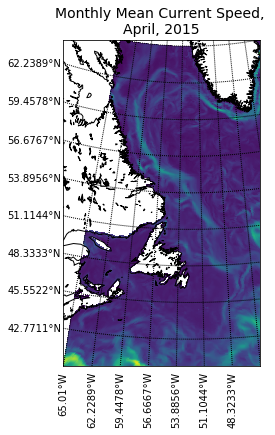

In [7]:
title = 'Monthly Mean Current Speed, \nApril, 2015'
projection = 'merc'
map_kwargs = {'projection': projection}
kwargs = {'map_kwargs': map_kwargs, 'title': title}

fig, ax = plot.plot_image(lats, lons, data, **kwargs)
fig.savefig('./plots/ecmwf_mean_april_current_2015.png', bbox_inches='tight')